In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=yf.download("BP", start="2021-03-01", end="2023-03-01") #Adjust symbol and date range as needed

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,24.820000,25.09,24.480000,24.580000,21.699253,12169100
2021-03-02,24.620001,25.08,24.590000,24.770000,21.866989,10630400
2021-03-03,24.959999,25.98,24.959999,25.580000,22.582058,20420600
2021-03-04,25.799999,26.48,25.540001,26.030001,22.979315,21228900
2021-03-05,26.830000,27.10,26.330000,26.770000,23.632593,21166300


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-22,39.540001,39.540001,38.730000,38.930000,37.585270,10401400
2023-02-23,39.709999,39.810001,39.290001,39.680000,38.309361,9015300
2023-02-24,39.459999,39.709999,39.200001,39.700001,38.328671,6980900
2023-02-27,40.080002,40.450001,39.880001,40.220001,38.830711,8712100
2023-02-28,40.480000,40.529999,39.580002,39.599998,38.232124,8506000


In [5]:
data['Adj Close'].head()

Date
2021-03-01    21.699253
2021-03-02    21.866989
2021-03-03    22.582058
2021-03-04    22.979315
2021-03-05    23.632593
Name: Adj Close, dtype: float64

In [6]:
data['Adj Close'].tail()

Date
2023-02-22    37.585270
2023-02-23    38.309361
2023-02-24    38.328671
2023-02-27    38.830711
2023-02-28    38.232124
Name: Adj Close, dtype: float64

In [7]:
data=data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 504 entries, 2021-03-01 to 2023-02-28
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
504 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [8]:
data.describe().round(2)

count    504.00
mean      27.23
std        4.06
min       20.63
25%       23.86
50%       26.76
75%       29.69
max       39.54
Name: Adj Close, dtype: float64

Movement of BP equity price over the specified time period - 2021-03-01 to 2023-03-01

array([<Axes: xlabel='Date'>], dtype=object)

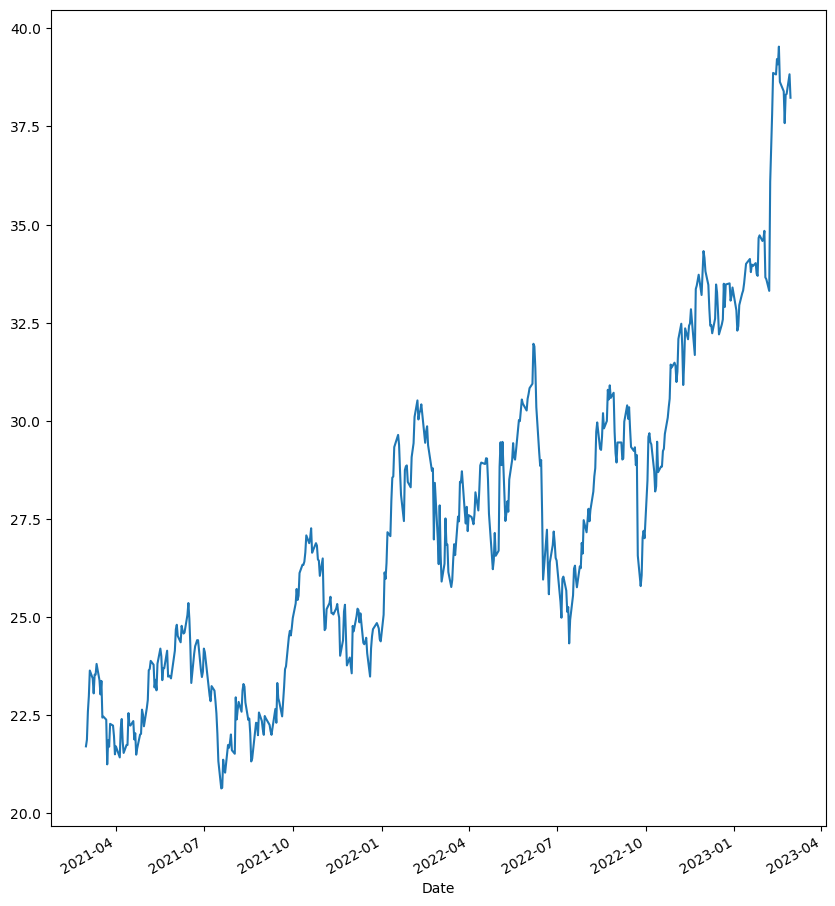

In [9]:
data.plot(figsize=(10, 12), subplots=True)

Annualised Average Return and Annualised Standard Deviation.

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [11]:
data=yf.download("BP", start="2021-03-01", end="2023-03-01") #Adjust symbol and date range as needed

[*********************100%%**********************]  1 of 1 completed


In [12]:
prices=data['Adj Close'].tolist()

In [13]:
returns=[(prices[i+1]-prices[i])/prices[i] for i in range(len(prices)-1)]

In [14]:
logreturns=[np.log(prices[i+1]/prices[i]) for i in range(len(prices)-1)]

In [15]:
avg_return=np.mean(returns)*252
avg_logreturn=np.mean(logreturns)*252

In [16]:
std_return=np.std(returns)*np.sqrt(252)
std_logreturn=np.std(logreturns)*np.sqrt(252)

In [17]:
print(f'Annualized Average Return:{avg_return:6f}')
print(f'Annualized Standard Deviation of Return:{std_return:6f}')

Annualized Average Return:0.337530
Annualized Standard Deviation of Return:0.327446


In [18]:
print(f'Annualized Average LogReturns:{avg_logreturn:6f}')
print(f'Annualized Standard Deviation of LogReturns:{std_return:6f}')

Annualized Average LogReturns:0.283762
Annualized Standard Deviation of LogReturns:0.327446


# Question 2

Design a non-dividend paying option and its associated pricing value

Binomial trees method

In [19]:
import numpy as np
import os

In [20]:
S0 = 38.23              # spot stock price - adjusted closed price on 2023-02-28
K = 40                  # strike price
T = 1.0                 # maturity of 1 year
r = 0.03                # risk free rate 
sig = 0.32               # standard deviation (volatility)
N = 3                   # number of periods or number of time steps  
payoff = "call"         # payoff 

Step 1: Create the binomial price tree

In [21]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u  

In [22]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1): #looping forwards, from 1 to N
    for i in range(z):  #looping forwards, from 0 to z-1
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1  # same as z=z+1

In [23]:
S

array([[38.23      , 45.98763858, 55.3194586 , 66.54489323],
       [ 0.        , 31.78099474, 38.23      , 45.98763858],
       [ 0.        ,  0.        , 26.41986992, 31.78099474],
       [ 0.        ,  0.        ,  0.        , 21.96311135]])

In [24]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4809878548752847

Step 2: Find option value at each final node

In [25]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        , 26.54489323],
       [ 0.        ,  0.        ,  0.        ,  5.98763858],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

Step 3: Find option value at earlier nodes

In [26]:
# for European Option
for j in range(N-1, -1, -1): # Column. looping backwards. From N-1 to 0
    for i in range(j+1):  # Row. looping forwards. From 0 to j
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]) #the theoretical value at each node.
V

array([[ 4.95963485,  8.94983494, 15.71746525, 26.54489323],
       [ 0.        ,  1.35780658,  2.85132514,  5.98763858],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [27]:
print('European ' + payoff, str( V[0,0]))

European call 4.959634854022563


# Question 3

The Black-Scholes Model (BSM) Method

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [29]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [30]:
euro_option_bs(38.23, 40, 1, 0.03, 0.32, 'call')

4.608726408228296

In [31]:
S = np.linspace(18.23,68.23,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 40, 1, 0.03, 0.32, 'call')

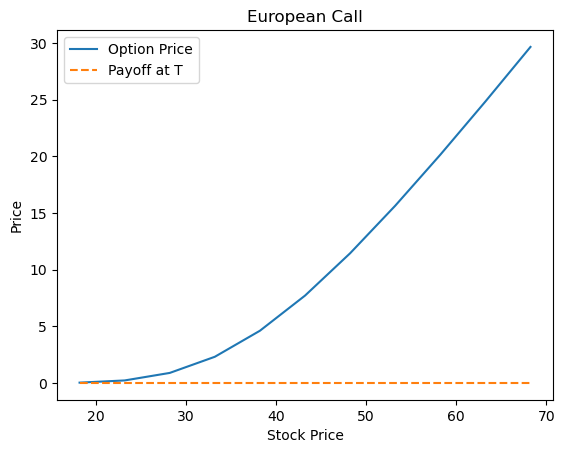

In [32]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# Question 4

Calculating The Greeks

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [33]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [34]:
delta(38.23, 40, 1, 0.03, 0.32, 'call')

0.5447135393331096

In [37]:
delta(38.23, 40, 1, 0.03, 0.32, 'put')

-0.4552864606668904

In [38]:
S = np.linspace(18.23,60.23,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 40, 1, 0.03, 0.32, 'call')
    Delta_Put [i] = delta(S[i], 40, 1, 0.03, 0.32, 'put')

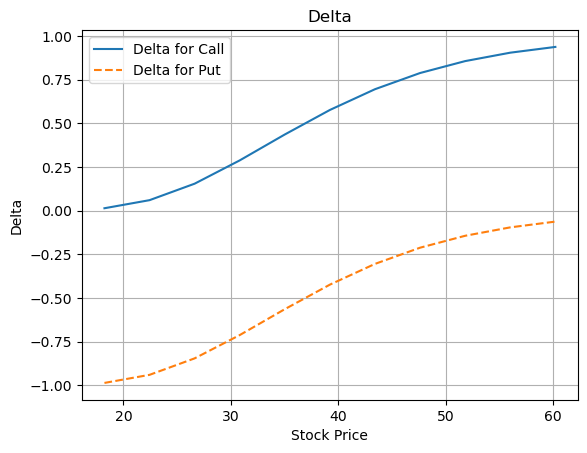

In [39]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

Gamma Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [40]:
def gamma(S, K, T, r,  vol, payoff):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    return gamma

In [41]:
gamma(38.23, 40, 1, 0.03, 0.32, 'call')

0.032405334314966956

In [42]:
gamma(38.23, 40, 1, 0.03, 0.32, 'put')

0.032405334314966956

In [43]:
S = np.linspace(18.23,60.23,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 40, 1, 0.03, 0.32, 'call')
    Gamma [i] = gamma(S[i], 40, 1, 0.03, 0.32, 'put')

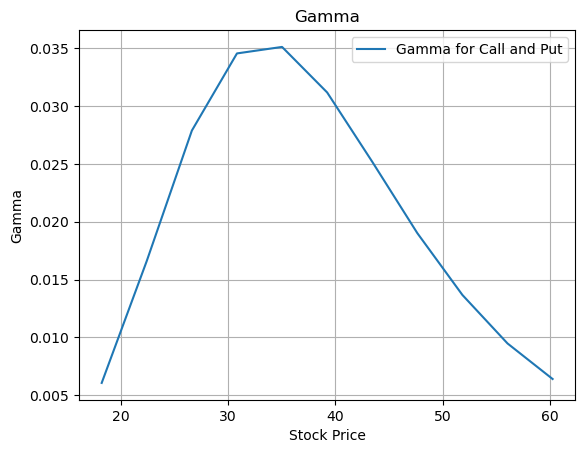

In [44]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [45]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [46]:
theta(38.23, 40, 1, 0.03, 0.32, 'call')

-2.9113770325396406

In [47]:
theta(38.23, 40, 1, 0.03, 0.32, 'put')

-1.746842392281431

In [48]:
T = np.linspace(0.25,2,8)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(38.23, 40, T[i], 0.03, 0.32, 'call')
    Theta_Put [i] = theta(38.23, 40, T[i], 0.03, 0.32, 'put')

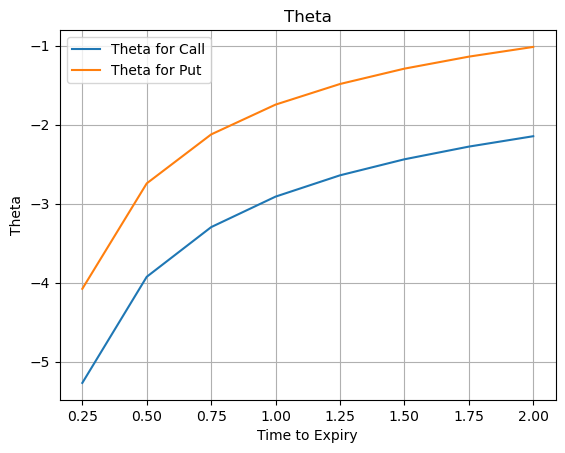

In [49]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [50]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [51]:
rho(38.23, 40, 1, 0.03, 0.32, 'call')

16.215672200476483

In [52]:
rho(38.23, 40, 1, 0.03, 0.32, 'put')

-22.60214914146384

In [53]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(38.23, 40, 1, r[i], 0.2, 'call')
    Rho_Put [i] = rho(38.23, 40, 1, r[i], 0.2, 'put')

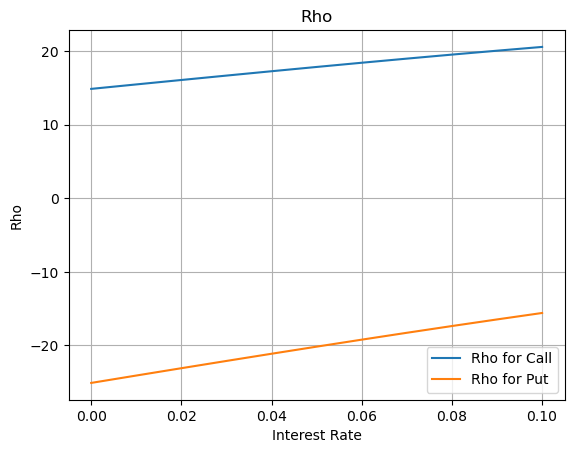

In [54]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [55]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [56]:
vega(38.23, 40, 1, 0.03, 0.32, 'call')

15.155667915783413

In [57]:
vega(38.23, 40, 1, 0.03, 0.32, 'put')

15.155667915783413

In [59]:
vol = np.linspace(0.1,1.0,11)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(38.23, 40, 1, 0.03, vol[i], 'call')

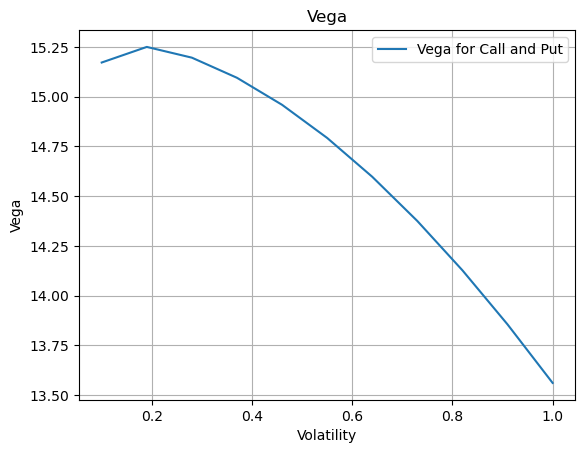

In [60]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])